In [67]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [68]:
raw_data_file_name= "Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_2.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.758759,79.948375
1,A,1,6.757569,79.952875
2,A,2,6.752263,79.955845
3,A,3,6.751405,79.954408
4,A,4,6.749772,79.953156


In [69]:
raw_data.shape

(149, 4)

In [70]:
raw_data = raw_data.sort_values(by=['cluster'])

In [71]:
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.758759,79.948375
46,A,0,6.758759,79.948375
1,A,1,6.757569,79.952875
47,A,1,6.757569,79.952875
2,A,2,6.752263,79.955845


In [72]:
raw_data = raw_data.groupby(['cluster']).mean()
raw_data

,lat,lon
cluster,,
0,6.758759,79.948375
1,6.757569,79.952875
2,6.752261,79.955838
3,6.751405,79.954408
4,6.749772,79.953156
5,6.749573,79.952969
6,6.748728,79.952420
7,6.748149,79.952291
8,6.746384,79.952237


In [73]:
raw_data.head()

,lat,lon
cluster,,
0,6.758759,79.948375
1,6.757569,79.952875
2,6.752261,79.955838
3,6.751405,79.954408
4,6.749772,79.953156


In [74]:
raw_data.shape

(60, 2)

In [75]:
raw_data = pd.DataFrame(raw_data).reset_index()

In [76]:
raw_data.head()

,cluster,lat,lon
0,0,6.758759,79.948375
1,1,6.757569,79.952875
2,2,6.752261,79.955838
3,3,6.751405,79.954408
4,4,6.749772,79.953156


In [77]:
raw_data.shape

(60, 3)

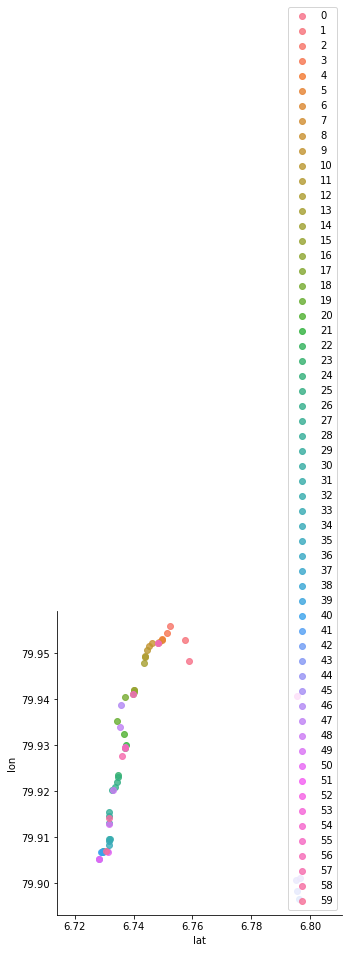

In [78]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [79]:
raw_data.to_json("Map_data/dilum_sir_route_without_duplications_radius_5_samplesize_2.json", orient='records')